In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)

In [2]:
data = pd.read_csv('Expense.csv',na_values=' ?')

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   int64 
 1   workclass       4680 non-null   object
 2   education       5000 non-null   object
 3   education-num   5000 non-null   int64 
 4   marital-status  5000 non-null   object
 5   occupation      4679 non-null   object
 6   relationship    5000 non-null   object
 7   race            5000 non-null   object
 8   sex             5000 non-null   object
 9   capital-gain    5000 non-null   int64 
 10  capital-loss    5000 non-null   int64 
 11  hours-per-week  5000 non-null   int64 
 12  native-country  4902 non-null   object
 13  Expense         5000 non-null   object
dtypes: int64(5), object(9)
memory usage: 547.0+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,38.6560,13.698292,17.0,28.0,37.0,48.0,90.0
education-num,5000.0,10.0650,2.558141,1.0,9.0,10.0,12.0,16.0
capital-gain,5000.0,1104.0800,7579.674371,0.0,0.0,0.0,0.0,99999.0
capital-loss,5000.0,90.0328,404.168991,0.0,0.0,0.0,0.0,3004.0
hours-per-week,5000.0,40.5662,12.154191,1.0,40.0,40.0,45.0,99.0


In [6]:
data.describe(include='object').T

,count,unique,top,freq
workclass,4680,8,Private,3444
education,5000,16,HS-grad,1602
marital-status,5000,7,Married-civ-spouse,2294
occupation,4679,14,Craft-repair,630
relationship,5000,6,Husband,2026
race,5000,5,White,4271
sex,5000,2,Male,3374
native-country,4902,39,United-States,4459
Expense,5000,2,<=50K,3776


In [7]:
data.isnull().sum().sort_values(ascending=False)

occupation        321
workclass         320
native-country     98
age                 0
education           0
education-num       0
marital-status      0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
Expense             0
dtype: int64

<AxesSubplot:>

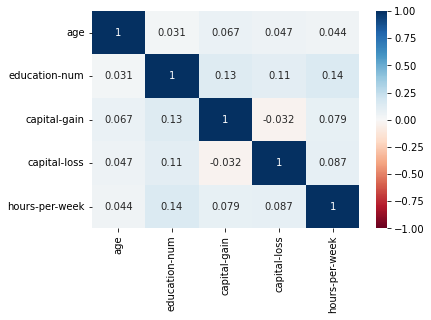

In [8]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

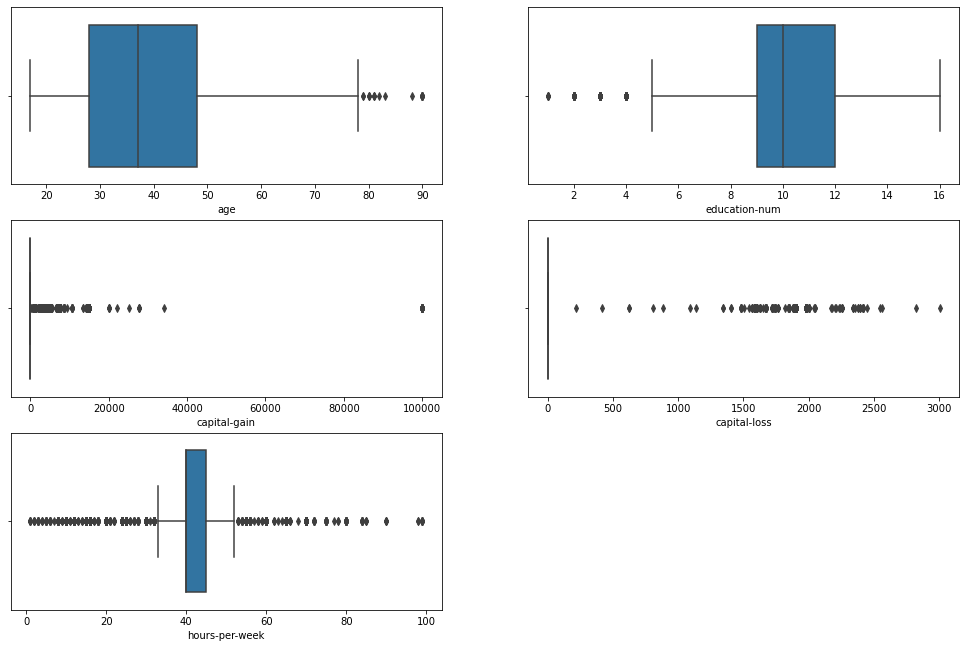

In [9]:
# BOX Plot for Numeric columns
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t=t+1

## Treat The missing values

In [10]:
data.isnull().sum().sort_values(ascending=False)

occupation        321
workclass         320
native-country     98
age                 0
education           0
education-num       0
marital-status      0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
Expense             0
dtype: int64

In [11]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K


In [12]:
from scipy.stats import chi2_contingency

In [13]:
cont_table = pd.crosstab(data['workclass'],data['education'])

In [14]:
chi,p_val,dof,expec = chi2_contingency(cont_table) 

In [15]:
if p_val<0.05:
    print('The two columns are dependent: Accept Ha:')
else:
    print('The two columns are Independent: Accept Ho:')

The two columns are dependent: Accept Ha:


In [16]:
data.groupby(by=['education','workclass'])['workclass'].count()

education      workclass        
 10th           Local-gov              4
                Never-worked           1
                Private              114
                Self-emp-inc           4
                Self-emp-not-inc      13
                State-gov              2
 11th           Federal-gov            2
                Local-gov              8
                Private              140
                Self-emp-inc           2
                Self-emp-not-inc       5
                State-gov              2
 12th           Federal-gov            1
                Local-gov              3
                Private               41
                Self-emp-not-inc       7
 1st-4th        Private               22
                Self-emp-not-inc       3
 5th-6th        Local-gov              1
                Private               39
                Self-emp-not-inc       2
 7th-8th        Federal-gov            1
                Local-gov              6
                Private 

In [17]:
data['workclass'].fillna('Private',inplace=True)

In [18]:
cont_table = pd.crosstab(data['occupation'],data['education'])

chi,p_val,dof,expec = chi2_contingency(cont_table) 

if p_val<0.05:
    print('The two columns are dependent: Accept Ha:')
else:
    print('The two columns are Independent: Accept Ho:')

The two columns are dependent: Accept Ha:


In [19]:
data.groupby(by=['education','occupation'])['occupation'].count()

education      occupation        
 10th           Adm-clerical           7
                Craft-repair          31
                Exec-managerial        5
                Farming-fishing        7
                Handlers-cleaners      9
                Machine-op-inspct     19
                Other-service         19
                Priv-house-serv        2
                Prof-specialty         1
                Protective-serv        2
                Sales                 19
                Tech-support           1
                Transport-moving      15
 11th           Adm-clerical          11
                Craft-repair          28
                Exec-managerial        3
                Farming-fishing        5
                Handlers-cleaners     13
                Machine-op-inspct     18
                Other-service         38
                Priv-house-serv        1
                Prof-specialty         3
                Sales                 22
                Tech-su

In [20]:
data.groupby(by=['education-num','education'])['education'].count()

education-num  education    
1               Preschool          5
2               1st-4th           25
3               5th-6th           46
4               7th-8th          105
5               9th               84
6               10th             156
7               11th             179
8               12th              57
9               HS-grad         1602
10              Some-college    1142
11              Assoc-voc        214
12              Assoc-acdm       157
13              Bachelors        823
14              Masters          259
15              Prof-school       90
16              Doctorate         56
Name: education, dtype: int64

In [21]:
for i in range(1,17):
    data['occupation']=np.where(data['occupation'].isnull() &(data['education-num']==i),
                               data[data['education-num']==i]['occupation'].mode()[0],
                               data['occupation'])

In [22]:
data.isnull().sum()

age                0
workclass          0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country    98
Expense            0
dtype: int64

In [23]:
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)

In [24]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Expense           0
dtype: int64

## Outlier Treatment

In [25]:
# Outlier Treatment (Capping)

for i in ['age','hours-per-week']:
    Q1,Q3 = np.quantile(data[i],[0.25,0.75])
    IQR = Q3-Q1
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    
    data.loc[data[i]>UL,i]= UL
    data.loc[data[i]<LL,i]= LL

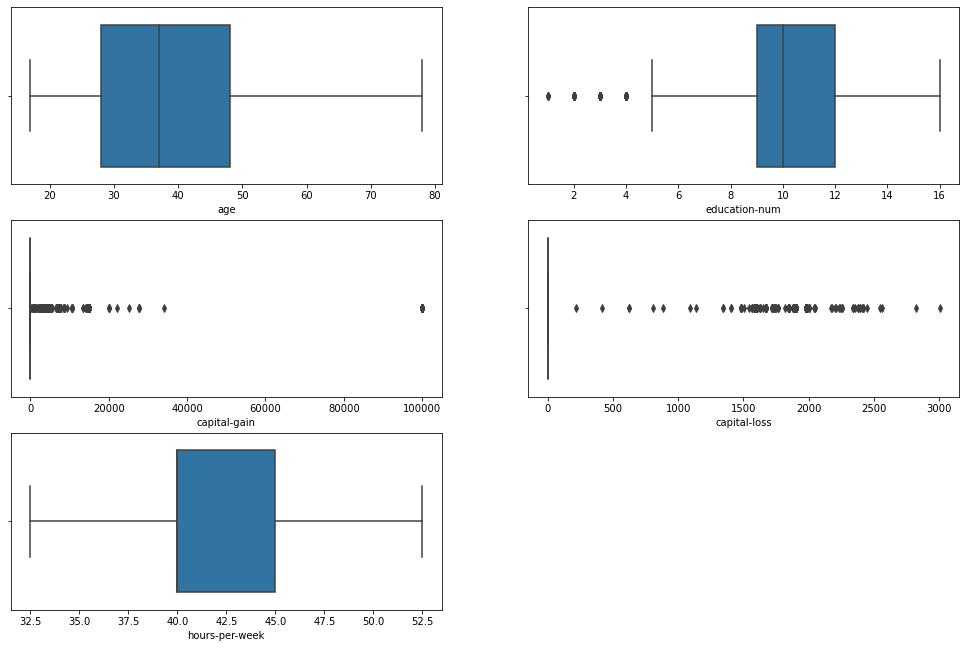

In [26]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include=np.number).columns:
    
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t=t+1

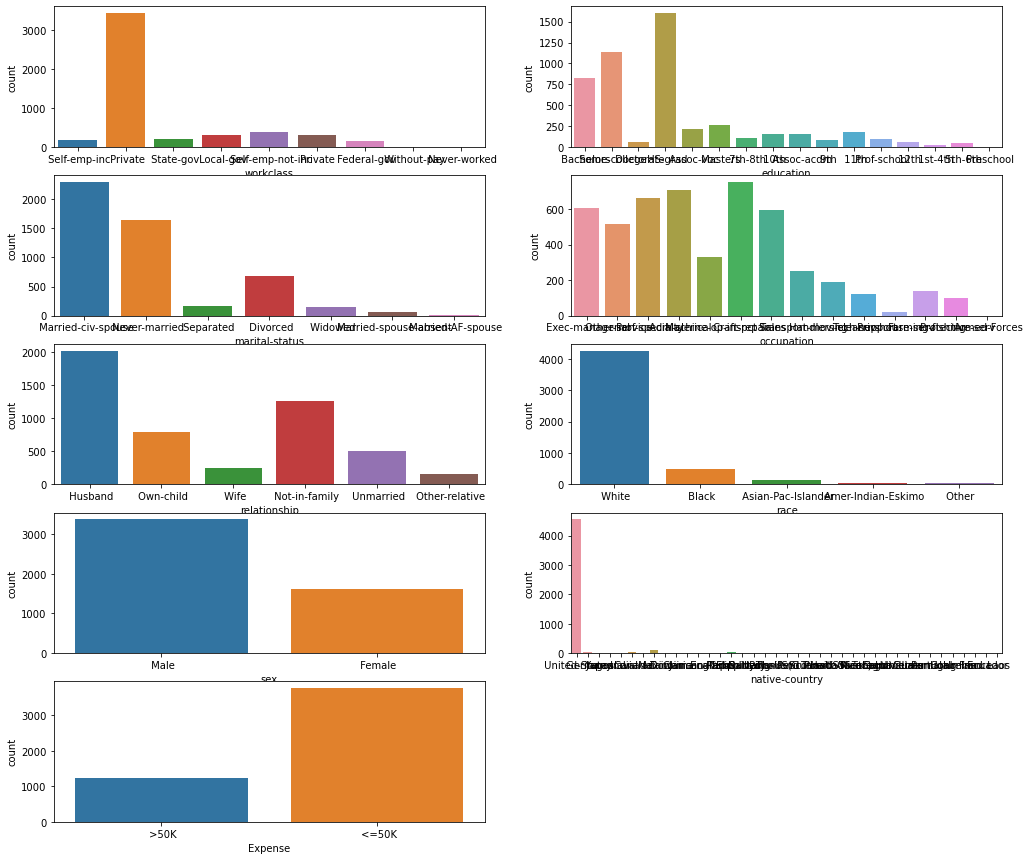

In [27]:
plt.figure(figsize=(17,15))
t=1
for i in data.select_dtypes(include='object').columns:
    
    plt.subplot(5,2,t)
    sns.countplot(data[i])
    t=t+1

In [28]:
data['capital-gain'].describe()

count     5000.000000
mean      1104.080000
std       7579.674371
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [29]:
data['capital-gain'].value_counts()

0        4587
15024      64
7688       48
7298       35
99999      26
5013       16
3103       14
8614       14
3325       13
5178       13
1055        8
3137        7
10520       7
4386        6
4064        6
4650        5
6849        5
3411        5
2174        5
594         5
2885        4
27828       4
2407        4
20051       4
2829        4
14084       4
1506        3
7430        3
914         3
14344       3
1409        3
4865        3
6514        2
4416        2
3464        2
2354        2
2202        2
3471        2
2597        2
2977        2
4101        2
10605       2
3908        2
6767        2
4787        2
3674        2
2580        2
13550       2
2228        2
2105        2
9386        1
10566       1
991         1
4931        1
2907        1
1086        1
3418        1
3432        1
7896        1
2346        1
34095       1
6497        1
114         1
2961        1
2062        1
22040       1
3273        1
2176        1
25124       1
2329        1
2635        1
5556  

In [30]:
data['capital-gain']= np.where(data['capital-gain']>0,1,data['capital-gain'])
data['capital-loss']= np.where(data['capital-loss']>0,1,data['capital-loss'])

In [31]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [32]:
data['workclass'].value_counts().index

Index([' Private', ' Self-emp-not-inc', 'Private', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

In [33]:
def workclass(data):
    if data in [' Private','Private']:
        return 'Private'
    elif data in [' Self-emp-not-inc',' Self-emp-inc']:
        return 'Self_employed'
    elif data in [' Local-gov',' State-gov',' Federal-gov']:
        return 'Gov_job'
    else:
        return 'unemployed'

In [34]:
data['workclass']= data['workclass'].apply(workclass)

In [35]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self_employed,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov_job,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov_job,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [36]:
del data['education']

In [37]:
data['marital-status'].value_counts().index

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

In [38]:
def marital(data):
    if data in [' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse']:
        return 'Married'
    elif data in [' Divorced',' Separated']:
        return 'Divorced'
    elif data in [' Widowed']:
        return 'Widowed'
    else:
        return 'Unmarried'

In [39]:
data['marital-status']= data['marital-status'].apply(marital)

In [40]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self_employed,13,Married,Exec-managerial,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,10,Unmarried,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,16,Married,Prof-specialty,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov_job,9,Married,Prof-specialty,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov_job,13,Unmarried,Prof-specialty,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [41]:
data['occupation'].value_counts().index

Index([' Craft-repair', ' Adm-clerical', ' Prof-specialty', ' Exec-managerial',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' Transport-moving',
       ' Handlers-cleaners', ' Farming-fishing', ' Tech-support',
       ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'],
      dtype='object')

In [42]:
def occupation(data):
    if data in [' Craft-repair',' Other-service',' Handlers-cleaners',' Farming-fishing',' Protective-serv',' Priv-house-serv']:
        return 'Primary'
    elif data in [' Adm-clerical',' Machine-op-inspct',' Sales',' Tech-support',' Armed-Forces']:
        return 'Secondry'
    else:
        return 'Tertiary'

In [43]:
data['occupation']= data['occupation'].apply(occupation)

In [44]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self_employed,13,Married,Tertiary,Husband,White,Male,1,0,50.0,United-States,>50K
1,20,Private,10,Unmarried,Primary,Own-child,White,Male,0,0,40.0,United-States,<=50K
2,50,Private,16,Married,Tertiary,Husband,White,Male,0,1,52.5,United-States,>50K
3,38,Gov_job,9,Married,Tertiary,Wife,White,Female,0,0,40.0,United-States,>50K
4,23,Gov_job,13,Unmarried,Tertiary,Own-child,White,Female,0,0,52.5,United-States,<=50K


In [45]:
data['relationship'].value_counts()

 Husband           2026
 Not-in-family     1262
 Own-child          797
 Unmarried          512
 Wife               242
 Other-relative     161
Name: relationship, dtype: int64

In [46]:
data['race'].value_counts()

 White                 4271
 Black                  490
 Asian-Pac-Islander     153
 Amer-Indian-Eskimo      51
 Other                   35
Name: race, dtype: int64

In [47]:
def native(data):
    if data==' United-States':
        return 'United_states'
    else:
        return 'Others'

In [48]:
data['native-country']= data['native-country'].apply(native)

In [49]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self_employed,13,Married,Tertiary,Husband,White,Male,1,0,50.0,United_states,>50K
1,20,Private,10,Unmarried,Primary,Own-child,White,Male,0,0,40.0,United_states,<=50K
2,50,Private,16,Married,Tertiary,Husband,White,Male,0,1,52.5,United_states,>50K
3,38,Gov_job,9,Married,Tertiary,Wife,White,Female,0,0,40.0,United_states,>50K
4,23,Gov_job,13,Unmarried,Tertiary,Own-child,White,Female,0,0,52.5,United_states,<=50K


In [50]:
data['Expense']=data['Expense'].map({' >50K':1,' <=50K':0})

In [51]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Expense
0,39,Self_employed,13,Married,Tertiary,Husband,White,Male,1,0,50.0,United_states,1
1,20,Private,10,Unmarried,Primary,Own-child,White,Male,0,0,40.0,United_states,0
2,50,Private,16,Married,Tertiary,Husband,White,Male,0,1,52.5,United_states,1
3,38,Gov_job,9,Married,Tertiary,Wife,White,Female,0,0,40.0,United_states,1
4,23,Gov_job,13,Unmarried,Tertiary,Own-child,White,Female,0,0,52.5,United_states,0


In [52]:
data_f = pd.get_dummies(data,drop_first=True)

In [53]:
data_f.shape

(5000, 25)

In [54]:
data_f.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,Expense,workclass_Private,workclass_Self_employed,workclass_unemployed,marital-status_Married,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_United_states
0,39,13,1,0,50.0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,1
1,20,10,0,0,40.0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,1
2,50,16,0,1,52.5,1,1,0,0,1,...,0,0,0,0,0,0,0,1,1,1
3,38,9,0,0,40.0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,23,13,0,0,52.5,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


## Train Test Split

In [55]:
x = data_f.drop(columns=['Expense'])
y = data_f['Expense']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
x.shape

(5000, 24)

In [58]:
from sklearn.model_selection  import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=2,train_size=0.8)

In [60]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4000, 24), (4000,), (1000, 24), (1000,))

In [61]:
x_train.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Private', 'workclass_Self_employed',
       'workclass_unemployed', 'marital-status_Married',
       'marital-status_Unmarried', 'marital-status_Widowed',
       'occupation_Secondry', 'occupation_Tertiary',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male',
       'native-country_United_states'],
      dtype='object')

In [62]:
for i in ['age','hours-per-week']:
    x_train[[i]]= StandardScaler().fit_transform(x_train[[i]])

In [63]:
x_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self_employed,workclass_unemployed,marital-status_Married,marital-status_Unmarried,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_United_states
225,-0.053314,14,0,0,1.789505,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
616,1.565053,9,0,0,-0.207710,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
1838,2.227112,10,0,0,-1.406040,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
957,2.153550,9,0,0,-0.207710,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
3414,-1.377433,10,0,0,-0.207710,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1


In [64]:
for i in ['age','hours-per-week']:
    x_test[[i]]= StandardScaler().fit_transform(x_test[[i]])

## Base Model

In [65]:
import statsmodels.api as sm

In [66]:
x_train_c = sm.add_constant(x_train)
x_test_c = sm.add_constant(x_test)

In [67]:
model = sm.Logit(y_train,x_train_c).fit()

         Current function value: 0.345758
         Iterations: 35


C:\Users\IT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3975
Method:                           MLE   Df Model:                           24
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.3787
Time:                        16:35:13   Log-Likelihood:                -1383.0
converged:                      False   LL-Null:                       -2226.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.3380      0.882     -7.188      0.000      -8.066      -4.610
age                              0.3349      0.060      5.572      0.000     

In [69]:
y_pred_prob = model.predict(x_test_c)

In [70]:
y_pred_prob

3523    0.018817
2047    0.054002
2410    0.015099
2961    0.153700
549     0.644343
1373    0.514882
4418    0.827163
2051    0.975040
2277    0.189957
4976    0.032897
1712    0.035925
983     0.074419
3935    0.461569
4959    0.045446
3027    0.076375
463     0.032811
1363    0.666935
3185    0.039443
380     0.086622
2620    0.180881
1677    0.267303
1499    0.567644
4073    0.187063
39      0.010619
4216    0.591937
4816    0.615811
1021    0.443642
3053    0.094814
630     0.369004
36      0.048363
1186    0.030468
80      0.657398
1790    0.147077
4590    0.626906
163     0.644052
65      0.532615
1432    0.462194
1877    0.003233
3413    0.006769
3488    0.003808
3363    0.013723
4222    0.002979
2124    0.047345
3493    0.969444
4412    0.239083
1979    0.088170
3173    0.782157
512     0.884969
4927    0.674835
181     0.233136
1745    0.673348
1818    0.029650
4374    0.153414
809     0.262350
3749    0.350674
1231    0.866076
297     0.063368
542     0.968237
4154    0.0329

In [71]:
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

In [72]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,cohen_kappa_score,f1_score

In [74]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy:\t',accuracy_score(test,pred))
    print('Precison:\t',precision_score(test,pred))
    print('Recall:\t',recall_score(test,pred))
    print('F1 Score:\t',f1_score(test,pred))
    print('Cohen-Kappa:\t',cohen_kappa_score(test,pred))
    print('Classification Report:\t\n',classification_report(test,pred))

In [75]:
validation(y_test,y_pred)

Confusion Matrix
 [[690  65]
 [101 144]]
Accuracy:	 0.834
Precison:	 0.6889952153110048
Recall:	 0.5877551020408164
F1 Score:	 0.6343612334801764
Cohen-Kappa:	 0.5278591541283881
Classification Report:	
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       755
           1       0.69      0.59      0.63       245

    accuracy                           0.83      1000
   macro avg       0.78      0.75      0.76      1000
weighted avg       0.83      0.83      0.83      1000



In [76]:
from sklearn.metrics import roc_auc_score,roc_curve

In [77]:
def roc_curv(test,pred):
    fpr,tpr,thres = roc_curve(test,pred)
    print('AUC:\t',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

AUC:	 0.8885957561832679


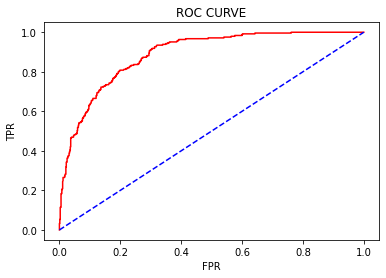

In [78]:
roc_curv(y_test,y_pred_prob)

## Model-II (Balancing the data)

In [79]:
from imblearn.under_sampling import RandomUnderSampler

In [80]:
ros = RandomUnderSampler(random_state=2)

In [81]:
x_sam,y_sam = ros.fit_resample(x_train_c,y_train)

In [82]:
y_sam.value_counts()

0    979
1    979
Name: Expense, dtype: int64

In [83]:
model_2 = sm.Logit(y_sam,x_sam).fit()

         Current function value: 0.407559
         Iterations: 35


C:\Users\IT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:                Expense   No. Observations:                 1958
Model:                          Logit   Df Residuals:                     1933
Method:                           MLE   Df Model:                           24
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.4120
Time:                        16:35:15   Log-Likelihood:                -798.00
converged:                      False   LL-Null:                       -1357.2
Covariance Type:            nonrobust   LLR p-value:                6.044e-221
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.6366      1.061     -5.313      0.000      -7.716      -3.557
age                              0.3848      0.081      4.731      0.000     

In [85]:
y_pred_prob = model_2.predict(x_test_c)

In [86]:
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

In [87]:
validation(y_test,y_pred)

Confusion Matrix
 [[583 172]
 [ 46 199]]
Accuracy:	 0.782
Precison:	 0.5363881401617251
Recall:	 0.8122448979591836
F1 Score:	 0.6461038961038962
Cohen-Kappa:	 0.49793878538034597
Classification Report:	
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       755
           1       0.54      0.81      0.65       245

    accuracy                           0.78      1000
   macro avg       0.73      0.79      0.74      1000
weighted avg       0.83      0.78      0.79      1000



AUC:	 0.8863251790782539


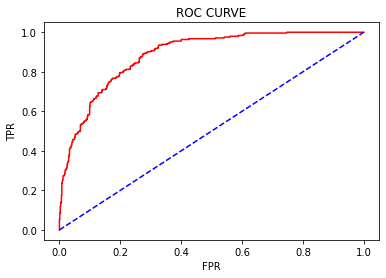

In [88]:
roc_curv(y_test,y_pred_prob)

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
smote = SMOTE(random_state=3)

In [91]:
x_sm,y_sm = smote.fit_resample(x_train_c,y_train)

In [92]:
model_2 = sm.Logit(y_sam,x_sam).fit()

         Current function value: 0.407559
         Iterations: 35


C:\Users\IT\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Expense   No. Observations:                 1958
Model:                          Logit   Df Residuals:                     1933
Method:                           MLE   Df Model:                           24
Date:                Wed, 17 Aug 2022   Pseudo R-squ.:                  0.4120
Time:                        16:35:17   Log-Likelihood:                -798.00
converged:                      False   LL-Null:                       -1357.2
Covariance Type:            nonrobust   LLR p-value:                6.044e-221
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -5.6366      1.061     -5.313      0.000      -7.716      -3.557
age                              0.3848      0.081      4.731      0.000       0.225       0.544
education-num                    0.2966      0.030      9.846      0.000       0.238       0.356
capital-gain                     1.9187      0.240      7.984      0.000       1.448       2.390
capital-loss                     0.7215      0.256      2.821      0.005       0.220       1.223
hours-per-week                   0.4472      0.070      6.345      0.000       0.309       0.585
workclass_Private                0.0920      0.183      0.502      0.616      -0.267       0.451
workclass_Self_employed          0.1181      0.243      0.486      0.627      -0.358       0.594
workclass_unemployed           -14.3482   6121.508     -0.002      0.998    -1.2e+04     1.2e+04
marital-status_Married           0.1429      0.524      0.273      0.785      -0.884       1.170
marital-status_Unmarried        -0.4637      0.263     -1.764      0.078      -0.979       0.052
marital-status_Widowed          -0.1947      0.503     -0.387      0.699      -1.181       0.792
occupation_Secondry              0.1165      0.160      0.730      0.465      -0.196       0.429
occupation_Tertiary              0.8194      0.167      4.916      0.000       0.493       1.146
relationship_ Not-in-family     -1.4441      0.507     -2.850      0.004      -2.437      -0.451
relationship_ Other-relative    -1.7979      0.727     -2.472      0.013      -3.223      -0.372
relationship_ Own-child         -2.4505      0.634     -3.866      0.000      -3.693      -1.208
relationship_ Unmarried         -1.4995      0.577     -2.600      0.009      -2.630      -0.369
relationship_ Wife               1.5555      0.343      4.540      0.000       0.884       2.227
race_ Asian-Pac-Islander         1.5137      0.866      1.748      0.081      -0.184       3.211
race_ Black                      1.4221      0.803      1.771      0.077      -0.152       2.996
race_ Other                      0.3847      1.263      0.304      0.761      -2.091       2.861
race_ White                      1.6532      0.772      2.141      0.032       0.140       3.166
sex_ Male                        0.7097      0.238      2.981      0.003       0.243       1.176
native-country_United_states     0.0351      0.266      0.132      0.895      -0.486       0.556
================================================================================================
"""

In [94]:
y_pred_prob = model_2.predict(x_test_c)

In [95]:
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

In [96]:
validation(y_test,y_pred)

Confusion Matrix
 [[583 172]
 [ 46 199]]
Accuracy:	 0.782
Precison:	 0.5363881401617251
Recall:	 0.8122448979591836
F1 Score:	 0.6461038961038962
Cohen-Kappa:	 0.49793878538034597
Classification Report:	
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       755
           1       0.54      0.81      0.65       245

    accuracy                           0.78      1000
   macro avg       0.73      0.79      0.74      1000
weighted avg       0.83      0.78      0.79      1000



## Other Models

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [98]:
from imblearn.under_sampling import RandomUnderSampler

In [99]:
rus = RandomUnderSampler(random_state=3)

In [100]:
x_train,y_train = rus.fit_resample(x_train,y_train)

In [101]:
def model_result(model,x_train,y_train,x_test,y_test):
    print(str(model))
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    roc_curv(y_test,y_pred_prob)

LogisticRegression()
Confusion Matrix
 [[581 174]
 [ 43 202]]
Accuracy:	 0.783
Precison:	 0.5372340425531915
Recall:	 0.8244897959183674
F1 Score:	 0.6505636070853462
Cohen-Kappa:	 0.5031596300027474
Classification Report:	
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       755
           1       0.54      0.82      0.65       245

    accuracy                           0.78      1000
   macro avg       0.73      0.80      0.75      1000
weighted avg       0.83      0.78      0.80      1000

AUC:	 0.8898661981348832


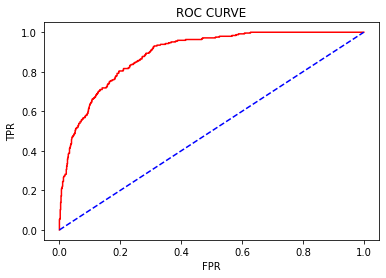

In [102]:
model_result(LogisticRegression(penalty='l2'),x_train,y_train,x_test,y_test)

KNeighborsClassifier(n_neighbors=7)
Confusion Matrix
 [[550 205]
 [ 35 210]]
Accuracy:	 0.76
Precison:	 0.5060240963855421
Recall:	 0.8571428571428571
F1 Score:	 0.6363636363636364
Cohen-Kappa:	 0.47443337348078396
Classification Report:	
               precision    recall  f1-score   support

           0       0.94      0.73      0.82       755
           1       0.51      0.86      0.64       245

    accuracy                           0.76      1000
   macro avg       0.72      0.79      0.73      1000
weighted avg       0.83      0.76      0.78      1000

AUC:	 0.8494120827138802


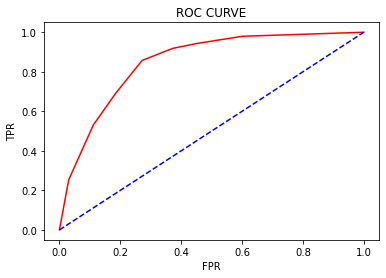

In [103]:
model_result(KNeighborsClassifier(n_neighbors=7),x_train,y_train,x_test,y_test)

GaussianNB()
Confusion Matrix
 [[487 268]
 [ 22 223]]
Accuracy:	 0.71
Precison:	 0.45417515274949083
Recall:	 0.9102040816326531
F1 Score:	 0.6059782608695652
Cohen-Kappa:	 0.41462626915080436
Classification Report:	
               precision    recall  f1-score   support

           0       0.96      0.65      0.77       755
           1       0.45      0.91      0.61       245

    accuracy                           0.71      1000
   macro avg       0.71      0.78      0.69      1000
weighted avg       0.83      0.71      0.73      1000

AUC:	 0.8577375320989323


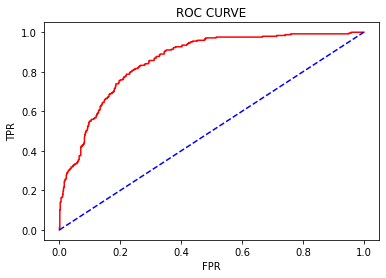

In [104]:
model_result(GaussianNB(),x_train,y_train,x_test,y_test)

DecisionTreeClassifier(max_depth=5)
Confusion Matrix
 [[553 202]
 [ 31 214]]
Accuracy:	 0.767
Precison:	 0.5144230769230769
Recall:	 0.8734693877551021
F1 Score:	 0.6475037821482602
Cohen-Kappa:	 0.49033161256452884
Classification Report:	
               precision    recall  f1-score   support

           0       0.95      0.73      0.83       755
           1       0.51      0.87      0.65       245

    accuracy                           0.77      1000
   macro avg       0.73      0.80      0.74      1000
weighted avg       0.84      0.77      0.78      1000

AUC:	 0.8721611028517368


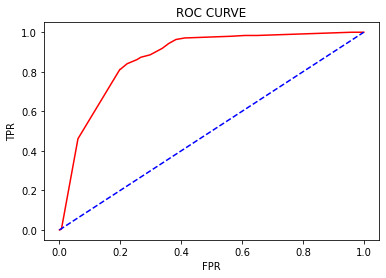

In [105]:
model_result(DecisionTreeClassifier(max_depth=5),x_train,y_train,x_test,y_test)

RandomForestClassifier(max_depth=4, n_estimators=200)
Confusion Matrix
 [[507 248]
 [ 21 224]]
Accuracy:	 0.731
Precison:	 0.4745762711864407
Recall:	 0.9142857142857143
F1 Score:	 0.6248256624825662
Cohen-Kappa:	 0.4461829860825167
Classification Report:	
               precision    recall  f1-score   support

           0       0.96      0.67      0.79       755
           1       0.47      0.91      0.62       245

    accuracy                           0.73      1000
   macro avg       0.72      0.79      0.71      1000
weighted avg       0.84      0.73      0.75      1000

AUC:	 0.8919827003649141


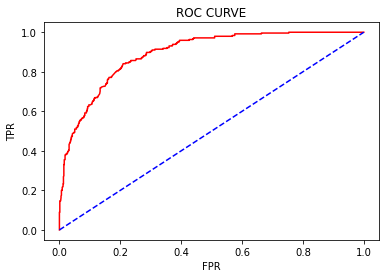

In [106]:
model_result(RandomForestClassifier(n_estimators=200,max_depth=4),x_train,y_train,x_test,y_test)

GradientBoostingClassifier(max_depth=4, n_estimators=200)
Confusion Matrix
 [[576 179]
 [ 39 206]]
Accuracy:	 0.782
Precison:	 0.535064935064935
Recall:	 0.8408163265306122
F1 Score:	 0.653968253968254
Cohen-Kappa:	 0.5060609493599184
Classification Report:	
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       755
           1       0.54      0.84      0.65       245

    accuracy                           0.78      1000
   macro avg       0.74      0.80      0.75      1000
weighted avg       0.84      0.78      0.80      1000

AUC:	 0.8889579672928775


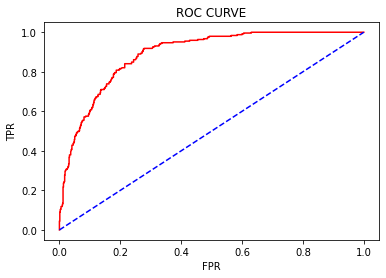

In [107]:
model_result(GradientBoostingClassifier(n_estimators=200,max_depth=4),x_train,y_train,x_test,y_test)

In [108]:
from lightgbm import LGBMClassifier

LGBMClassifier(n_estimators=93, num_leaves=16, scale_pos_weight=1)
Confusion Matrix
 [[581 174]
 [ 37 208]]
Accuracy:	 0.789
Precison:	 0.5445026178010471
Recall:	 0.8489795918367347
F1 Score:	 0.6634768740031898
Cohen-Kappa:	 0.5202582874812424
Classification Report:	
               precision    recall  f1-score   support

           0       0.94      0.77      0.85       755
           1       0.54      0.85      0.66       245

    accuracy                           0.79      1000
   macro avg       0.74      0.81      0.75      1000
weighted avg       0.84      0.79      0.80      1000

AUC:	 0.8957318556561698


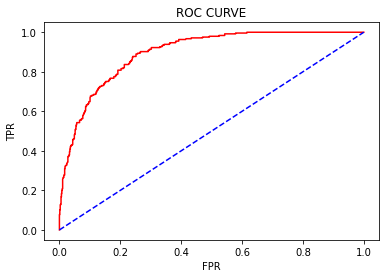

In [109]:
model_result(LGBMClassifier(scale_pos_weight=1,n_estimators=93,num_leaves=16),x_train,y_train,x_test,y_test)

## Grid search CV

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
params = {'learning_rate':[0.001,0.01,0.1,1,10],
         'n_estimators':[200,250,300,400,500],
         'max_depth':[4,5,6,7,8]}

In [114]:
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),
                   param_grid=params,
                   scoring='f1',
                   cv=3,
                   verbose=3)

In [115]:
gscv.fit(x_train,y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.805 total time=   0.3s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.794 total time=   0.3s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=200;, score=0.788 total time=   0.3s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=250;, score=0.811 total time=   0.3s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=250;, score=0.794 total time=   0.3s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=250;, score=0.791 total time=   0.3s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=300;, score=0.812 total time=   0.4s
[CV 2/3] END learning_rate=0.001, max_depth=4, n_estimators=300;, score=0.794 total time=   0.4s
[CV 3/3] END learning_rate=0.001, max_depth=4, n_estimators=300;, score=0.791 total time=   0.4s
[CV 1/3] END learning_rate=0.001, max_depth=4, n_estimators=400;

[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=400;, score=0.820 total time=   0.6s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=400;, score=0.811 total time=   0.6s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=400;, score=0.793 total time=   0.6s
[CV 1/3] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.812 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.815 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.795 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.818 total time=   0.4s
[CV 2/3] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.801 total time=   0.4s
[CV 3/3] END learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.783 total time=   0.3s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=250;, score=0.817 total time=   0.4s
[CV 2/3] END learning_rate=0.01, max_dep

[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=250;, score=0.761 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.768 total time=   0.6s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.780 total time=   0.6s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=300;, score=0.748 total time=   0.6s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.747 total time=   0.8s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.769 total time=   0.8s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=400;, score=0.740 total time=   0.8s
[CV 1/3] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.755 total time=   1.1s
[CV 2/3] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.769 total time=   1.1s
[CV 3/3] END learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.745 total time=   1.0s
[CV 1/3] END learning_rate=0.1, max_depth=6, n_est

[CV 3/3] END learning_rate=1, max_depth=6, n_estimators=200;, score=0.721 total time=   0.5s
[CV 1/3] END learning_rate=1, max_depth=6, n_estimators=250;, score=0.730 total time=   0.6s
[CV 2/3] END learning_rate=1, max_depth=6, n_estimators=250;, score=0.752 total time=   0.6s
[CV 3/3] END learning_rate=1, max_depth=6, n_estimators=250;, score=0.729 total time=   0.6s
[CV 1/3] END learning_rate=1, max_depth=6, n_estimators=300;, score=0.722 total time=   0.7s
[CV 2/3] END learning_rate=1, max_depth=6, n_estimators=300;, score=0.753 total time=   0.7s
[CV 3/3] END learning_rate=1, max_depth=6, n_estimators=300;, score=0.729 total time=   0.7s
[CV 1/3] END learning_rate=1, max_depth=6, n_estimators=400;, score=0.713 total time=   0.8s
[CV 2/3] END learning_rate=1, max_depth=6, n_estimators=400;, score=0.757 total time=   0.9s
[CV 3/3] END learning_rate=1, max_depth=6, n_estimators=400;, score=0.720 total time=   0.9s
[CV 1/3] END learning_rate=1, max_depth=6, n_estimators=500;, score=0.

[CV 1/3] END learning_rate=10, max_depth=7, n_estimators=200;, score=0.370 total time=   0.5s
[CV 2/3] END learning_rate=10, max_depth=7, n_estimators=200;, score=0.630 total time=   0.6s
[CV 3/3] END learning_rate=10, max_depth=7, n_estimators=200;, score=0.576 total time=   0.6s
[CV 1/3] END learning_rate=10, max_depth=7, n_estimators=250;, score=0.449 total time=   0.7s
[CV 2/3] END learning_rate=10, max_depth=7, n_estimators=250;, score=0.656 total time=   0.8s
[CV 3/3] END learning_rate=10, max_depth=7, n_estimators=250;, score=0.609 total time=   0.7s
[CV 1/3] END learning_rate=10, max_depth=7, n_estimators=300;, score=0.511 total time=   1.0s
[CV 2/3] END learning_rate=10, max_depth=7, n_estimators=300;, score=0.656 total time=   1.0s
[CV 3/3] END learning_rate=10, max_depth=7, n_estimators=300;, score=0.586 total time=   0.9s
[CV 1/3] END learning_rate=10, max_depth=7, n_estimators=400;, score=0.463 total time=   1.2s
[CV 2/3] END learning_rate=10, max_depth=7, n_estimators=400

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 250, 300, 400, 500]},
             scoring='f1', verbose=3)

In [116]:
gscv.best_score_

0.8104007644191938

In [118]:
gscv.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=300)
Confusion Matrix
 [[563 192]
 [ 27 218]]
Accuracy:	 0.781
Precison:	 0.5317073170731708
Recall:	 0.889795918367347
F1 Score:	 0.6656488549618321
Cohen-Kappa:	 0.5177273728253688
Classification Report:	
               precision    recall  f1-score   support

           0       0.95      0.75      0.84       755
           1       0.53      0.89      0.67       245

    accuracy                           0.78      1000
   macro avg       0.74      0.82      0.75      1000
weighted avg       0.85      0.78      0.80      1000

AUC:	 0.8976104879037708


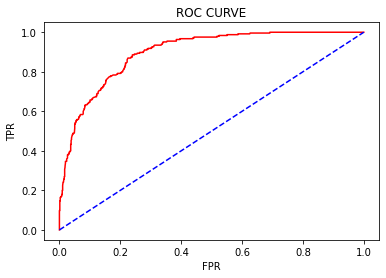

In [119]:
model_result(GradientBoostingClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)